### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [8]:
# Here I am importing all of the necessary libraries for the analysis:

ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')
library(ggplot2)
library(tidyverse)

In [9]:
#Checking the data in the ny dataframe
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [10]:
#Checking the data in the wash dataframe
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [11]:
#Checking the data in the chi dataframe
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Data Cleaning (Wrangling)


**In the following command boxes, I take a few steps to ensure my data is ready for the analysis. I remove columns that I dont need, validate the selection of the columns, ensure each table is labeled with its appropriate location, merge all tables into one, and validate the merge was successful**

In [12]:
#Selecting only the columns that I will need to answer the questions
ny.new<-ny[c(2:7)]
wash.new<-wash[c(2:7)]
chi.new<-chi[c(2:7)]

In [13]:
#Validating if the columns were selected correctly for each dataset
names(ny.new)
names(wash.new)
names(chi.new)

[1] "Start.Time"    "End.Time"      "Trip.Duration" "Start.Station"
[5] "End.Station"   "User.Type"

[1] "Start.Time"    "End.Time"      "Trip.Duration" "Start.Station"
[5] "End.Station"   "User.Type"

[1] "Start.Time"    "End.Time"      "Trip.Duration" "Start.Station"
[5] "End.Station"   "User.Type"

In [14]:
#labeling the location prior to merge
wash.new$location <- 'DC'
ny.new$location <- 'NYC'
chi.new$location <- 'CHI'

In [15]:
#merge datasets together into one dataset
mainList <-rbind(wash.new,ny.new,chi.new)

In [16]:
#Validating the merge was successful by showing the top rows of the new dataframe
head(mainList)

Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,location
2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,DC
2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,DC
2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,DC
2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,DC
2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,DC
2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,DC


### Question 1


**What is the percentage of subcribers from the entire population**

In [17]:
#in this command I create a dataframe to store the aggregate results
aggList = aggregate(location~User.Type,mainList,FUN = length)
colnames(aggList)<- c("User_Type","User_Count")
#Below I create a percentage column for each user type
aggList$Percentage = aggList$User_Count/sum(aggList$User_Count)
aggList$Percentage = aggList$Percentage * 100
aggList$Percentage = round(aggList$Percentage,digits = 2)

In [18]:
#Showing the new datafram to ensure it was created correctly
print(aggList)

   User_Type User_Count Percentage
1                   121       0.08
2   Customer      30754      20.17
3 Subscriber     121576      79.75


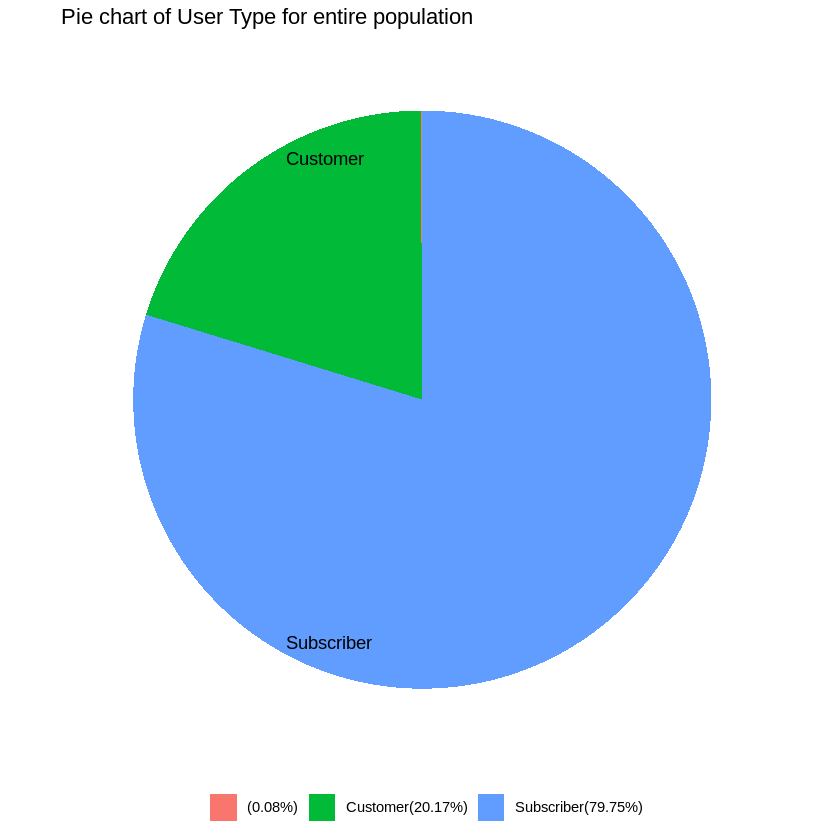

In [19]:
#In this command I create a Pie Chart to show the percentages for each User Type in a graphical form
aggListlab <- aggList
pieChart <- ggplot(data = aggListlab, aes(x= '',y = User_Count, fill = paste0(User_Type,'(', round(User_Count/sum(User_Count)*100,digits = 2),'%)' )))
pieChart <- pieChart + geom_bar(width = 1, stat = "identity")
pieChart <- pieChart + geom_text(aes(x = 1.4,label = User_Type ), position = position_stack(vjust = 0.7))
pieChart <- pieChart + theme_void()
pieChart <- pieChart + theme_classic()
pieChart <- pieChart + theme(legend.position = "bottom")
pieChart  <- pieChart + coord_polar("y", start=0)
pieChart <- pieChart +   theme(axis.line = element_blank())
pieChart <- pieChart +   theme(axis.text = element_blank())
pieChart <- pieChart +   theme(axis.ticks = element_blank())
pieChart <- pieChart +   labs(x = NULL, y = NULL, fill = NULL)
pieChart <- pieChart + labs(title ="Pie chart of User Type for entire population")
pieChart


**Summary of your question 1 results goes here**
>Based on the results, **subscribers consist of 79.75% of the total population.** The pie chart clearly show the dominance of the subscriber population compared to the remainder

>Additional insights: 20.17% of the population were categorized as "Customers" and the rest had no categorization (0.08%) . This can signify a failure in categorization for a small subsection of the population and should be further investigated

### Question 2

**What are the average trip durations for each user type by location**

In [20]:
#in this command I created a dataframe to store the aggregate results
aggList = aggregate(Trip.Duration~User.Type+location,mainList,mean)
colnames(aggList)<- c("User_Type","Location","Average_Time")

In [21]:
#Here I am printing the list to ensure it came out correct
print(aggList)

   User_Type Location Average_Time
1                 CHI    3020.0000
2   Customer      CHI    1929.9771
3 Subscriber      CHI     685.0270
4   Customer       DC    2634.4289
5 Subscriber       DC     733.3260
6                 NYC    1838.4915
7   Customer      NYC    2193.0759
8 Subscriber      NYC     755.3829


In [22]:
#During Question 1's excersize, I found out the blank user_type entries were outliers, with only 0.08% of the entire dataset being unlabeled. So for better charting, I remove those from the dataframe:

aggListFiltered <- aggList[aggList$User_Type != "",]
print(aggListFiltered)

   User_Type Location Average_Time
2   Customer      CHI    1929.9771
3 Subscriber      CHI     685.0270
4   Customer       DC    2634.4289
5 Subscriber       DC     733.3260
7   Customer      NYC    2193.0759
8 Subscriber      NYC     755.3829


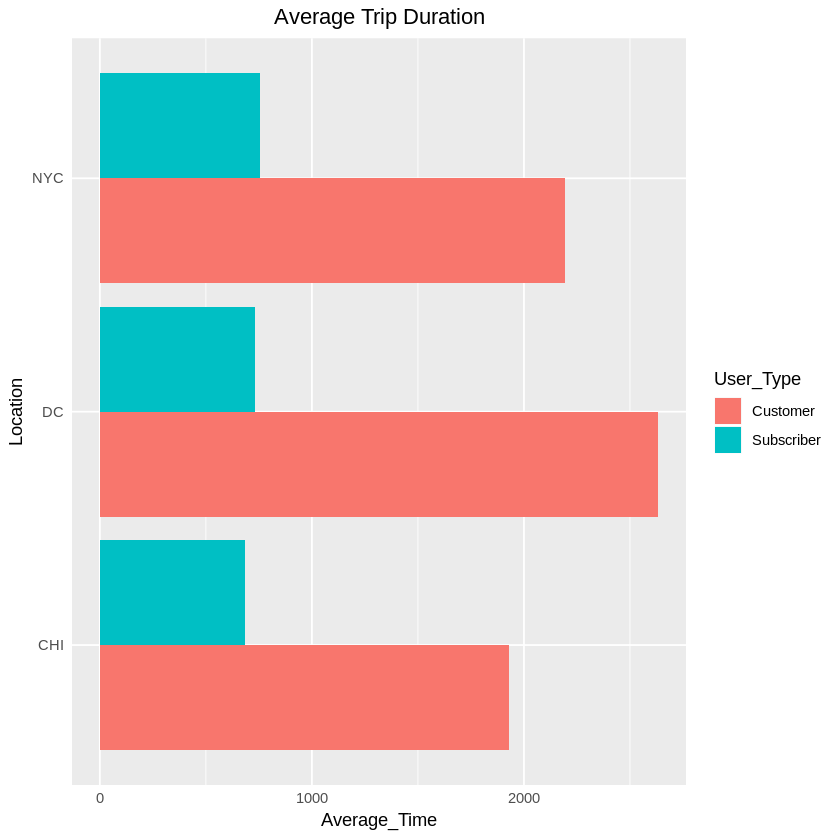

In [23]:
# In this command box, I am creating the bar graph. I decided to flip the axis as it is better to compare average times with

bre <- c(seq(-3000, 3000, by = 1000))
labl = c(seq(3000, 0, -1000), seq(1000, 3000, 1000))
barplt <- aggListFiltered %>%  # Cast the users table as a number
mutate(Average_Time = as.numeric(Average_Time)) %>%
ggplot(aes(Location, y = Average_Time, fill = User_Type, )) +
geom_col(position = "dodge") +
scale_y_continuous(breaks = bre, labels = labl) +
coord_flip() +
labs(title="Average Trip Duration") +
theme(plot.title = element_text(hjust = .5),
axis.ticks = element_blank())
barplt

**Summary of your question 2 results goes here.**

>The average trip duration are as follows:

>Chicago Customers: 1929

>Chicago Subscribers : 685

>DC Customers: 2634

>DC Subscribers : 733

>NYC Customers: 2193

>NYC SUbscribers: 755

It is clear that Customers hold a much higher average trip duration compared to subscribers on every city. A root cause analysis is warranted to determine the main reason why customers utilize the bikes more. The learning lessons can be apply to assist in increasing the trip time of the subscribers to increase revenue.




### Question 3

**What location shares the most amount of bikes**

In [24]:
#Here I am creating a list out of the aggregation of city bike count:
aggList = aggregate(User.Type~location,mainList,FUN = length)
colnames(aggList)<- c("Location","Total_Count")

In [25]:
#I printed the list to see if the aggregation worked

aggList

Location,Total_Count
CHI,8630
DC,89051
NYC,54770


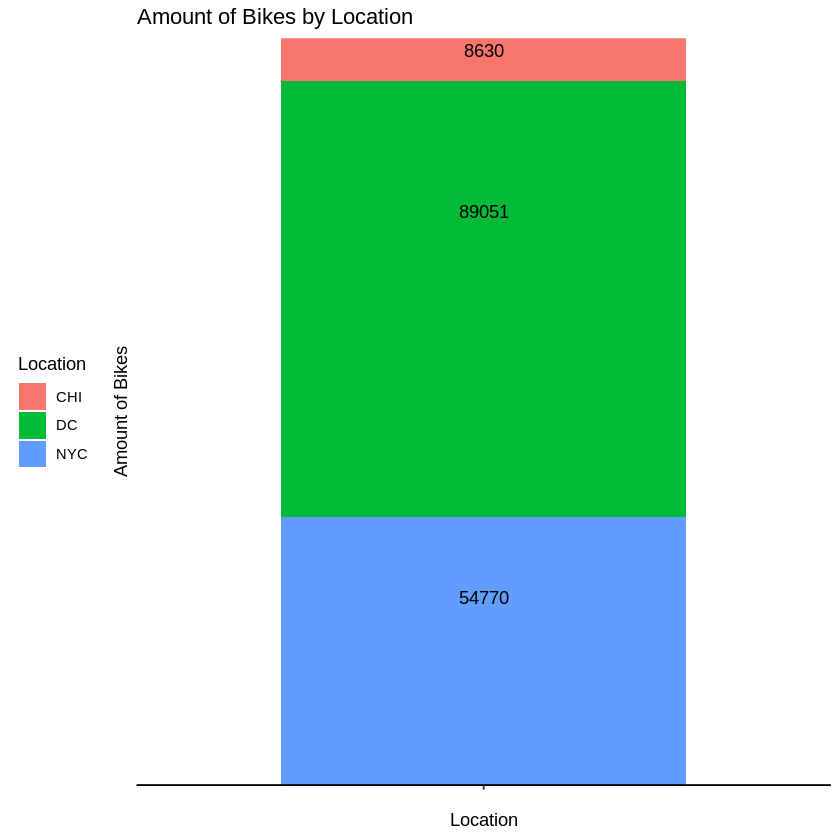

In [33]:
#Here I am creating the stacked bar chart:

aggListlab <- aggList
stackedChart <- ggplot(data = aggListlab, aes(x= '',y = Total_Count, fill = Location))
stackedChart <- stackedChart + geom_bar(width = .7, stat = "identity")
stackedChart <- stackedChart + geom_text(aes(label = Total_Count ), position = position_stack(vjust = 0.7))
stackedChart <- stackedChart + theme_void()
stackedChart <- stackedChart + theme_classic()
stackedChart <- stackedChart + scale_x_discrete("Location")
stackedChart <- stackedChart + scale_y_discrete("Amount of Bikes")
stackedChart <- stackedChart + labs(title="Amount of Bikes by Location")
stackedChart <- stackedChart + theme(legend.position = "left")
stackedChart

In [34]:
#Here I used different math functions to analyze the data in different ways
print("Mean of Total Count",)
mean(aggList$Total_Count)
print("Median of Total Count",)
median(aggList$Total_Count)
print("Standard Deviation of Total Count",)
sd(aggList$Total_Count)

#Here I printed the final results list
print("List of Total Count",)
print(aggList)

[1] "Mean of Total Count"


[1] 50817

[1] "Median of Total Count"


[1] 54770

[1] "Standard Deviation of Total Count"


[1] 40355.97

[1] "List of Total Count"
  Location Total_Count
1      CHI        8630
2       DC       89051
3      NYC       54770


**Summary of your question 3 results goes here.**

The location that shares the most amount is DC at 89,051. NYC comes at a second place at 54,770. Chicaco comes at third place at 8,630 bikes. DC bike sharing market should be further studied to determine why they are being more successful at renting out bikes. The lessons can be used to expand the markets of NYC and Chicago.



## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [285]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')